# Part 2: Logistic Regression

### 1. Write the logistic regression equation relating independent variables to dependent variable y.  
#### Solution
First, the formula for logistic regression that links independent variables to dependent variables, y.
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}} is the formula for logistic regression.
The probability of the tumor being malignant is denoted by P(y=1|X).
The intercept term is β0.
The coefficients that correspond to the attributes x1, x2, …, xn are β1, β2, …, βn.

## 2.Importing Data and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,roc_curve, f1_score, cohen_kappa_score, confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

file_path = "C:\\Users\\Asus\\OneDrive\\Desktop\\Stats_TABA\\Cancerdata.csv"
cancer_data = pd.read_csv(file_path)

print(cancer_data.info())
print(cancer_data.dtypes)
print(cancer_data.columns)
print(cancer_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Exploratory Data Analysis and Data Description

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

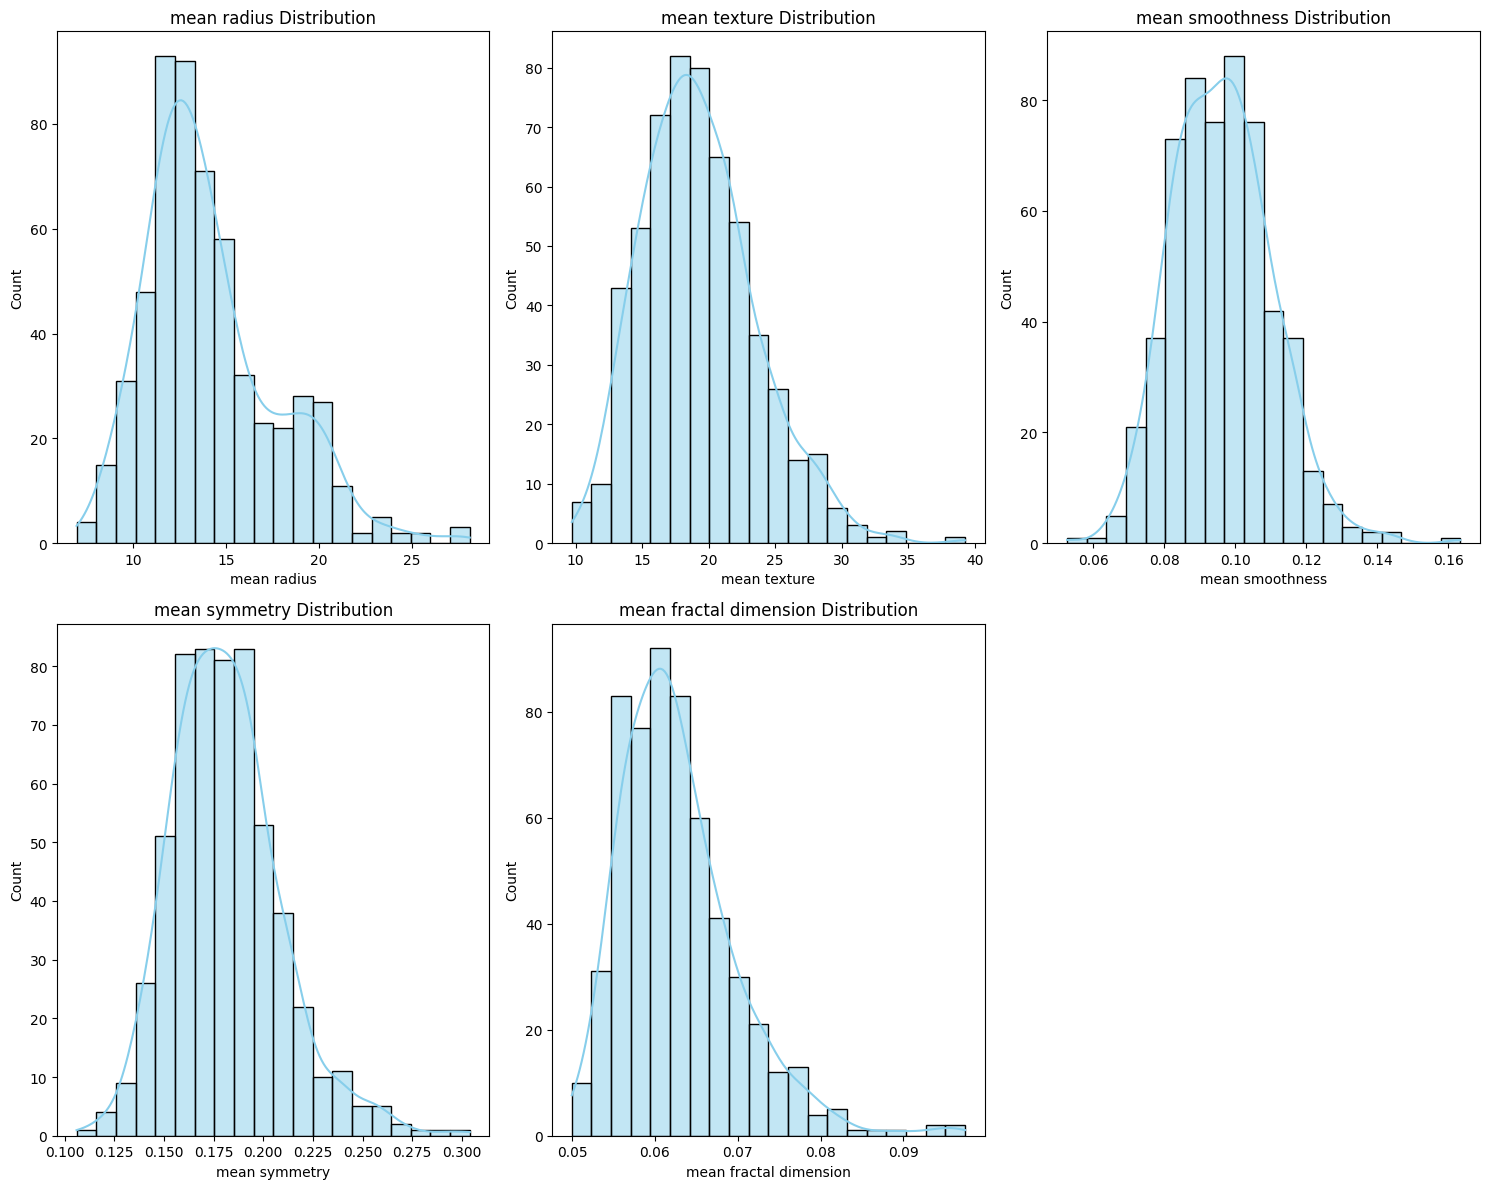

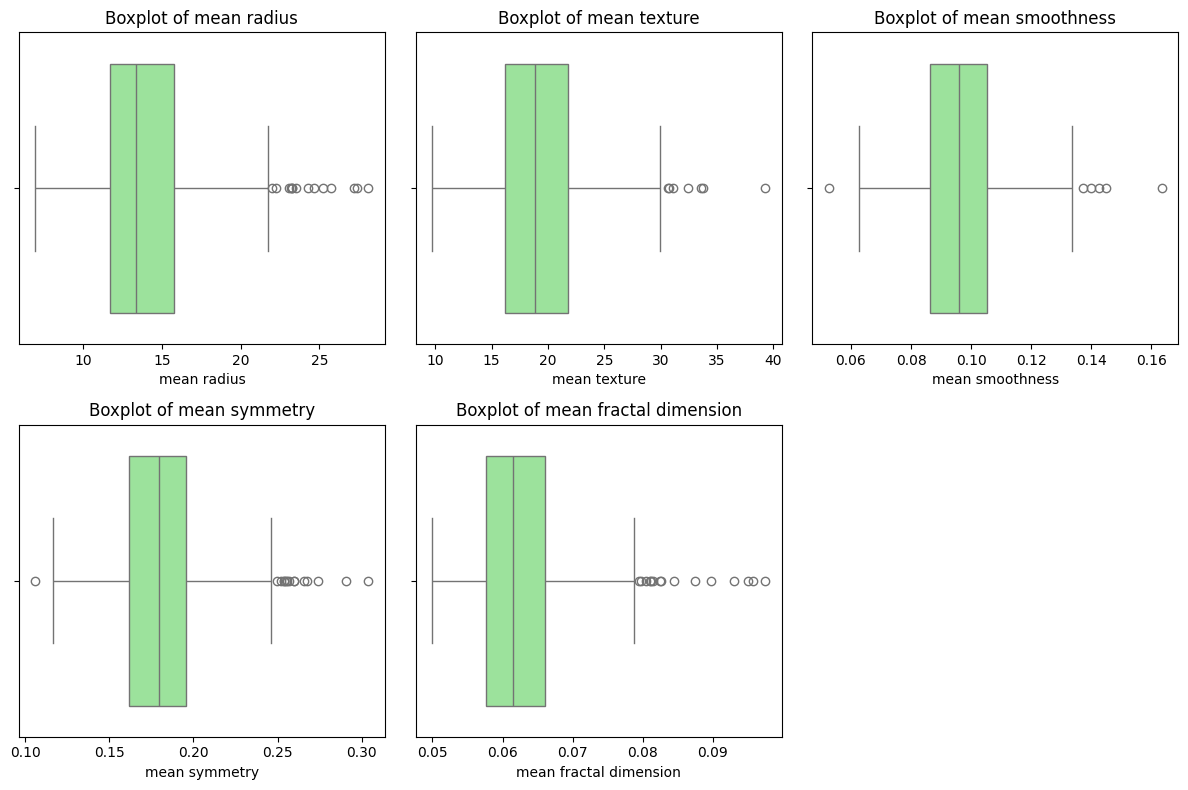

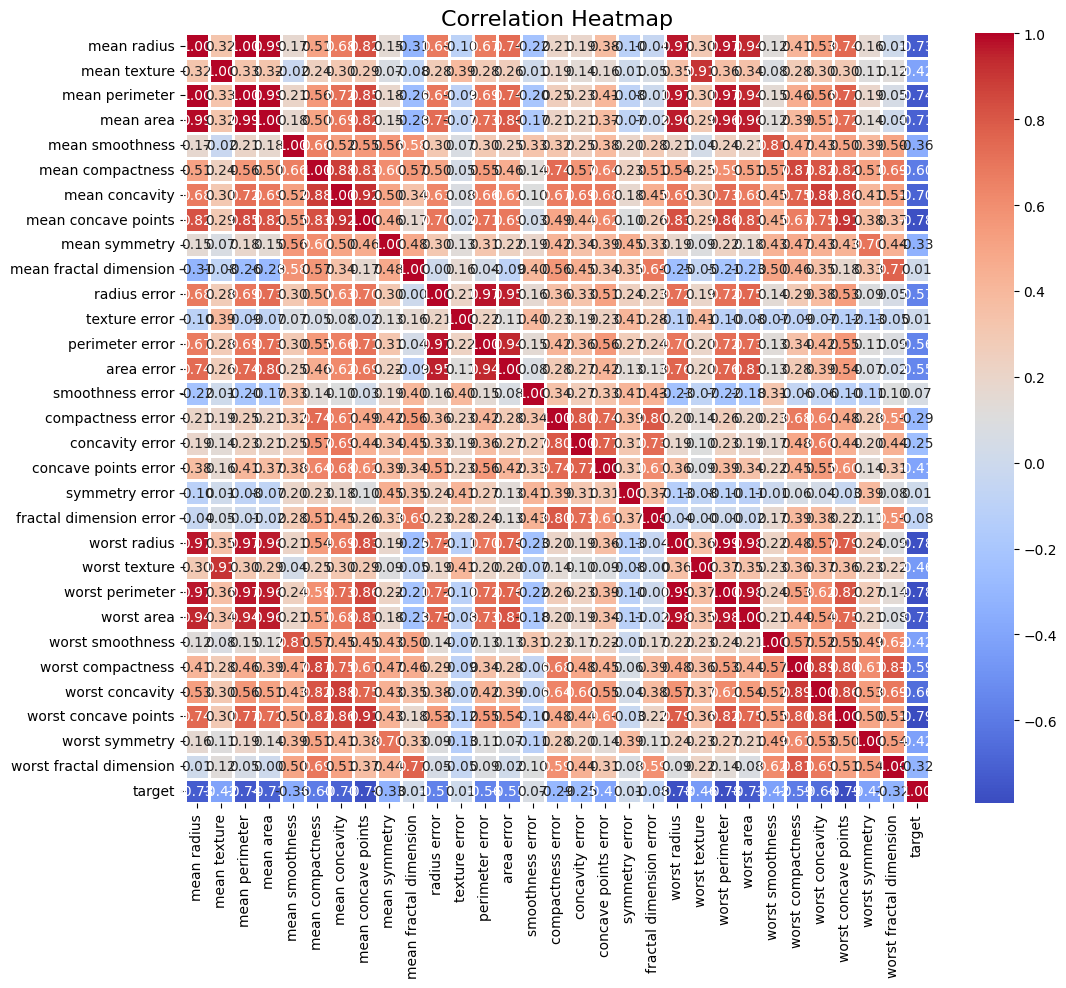

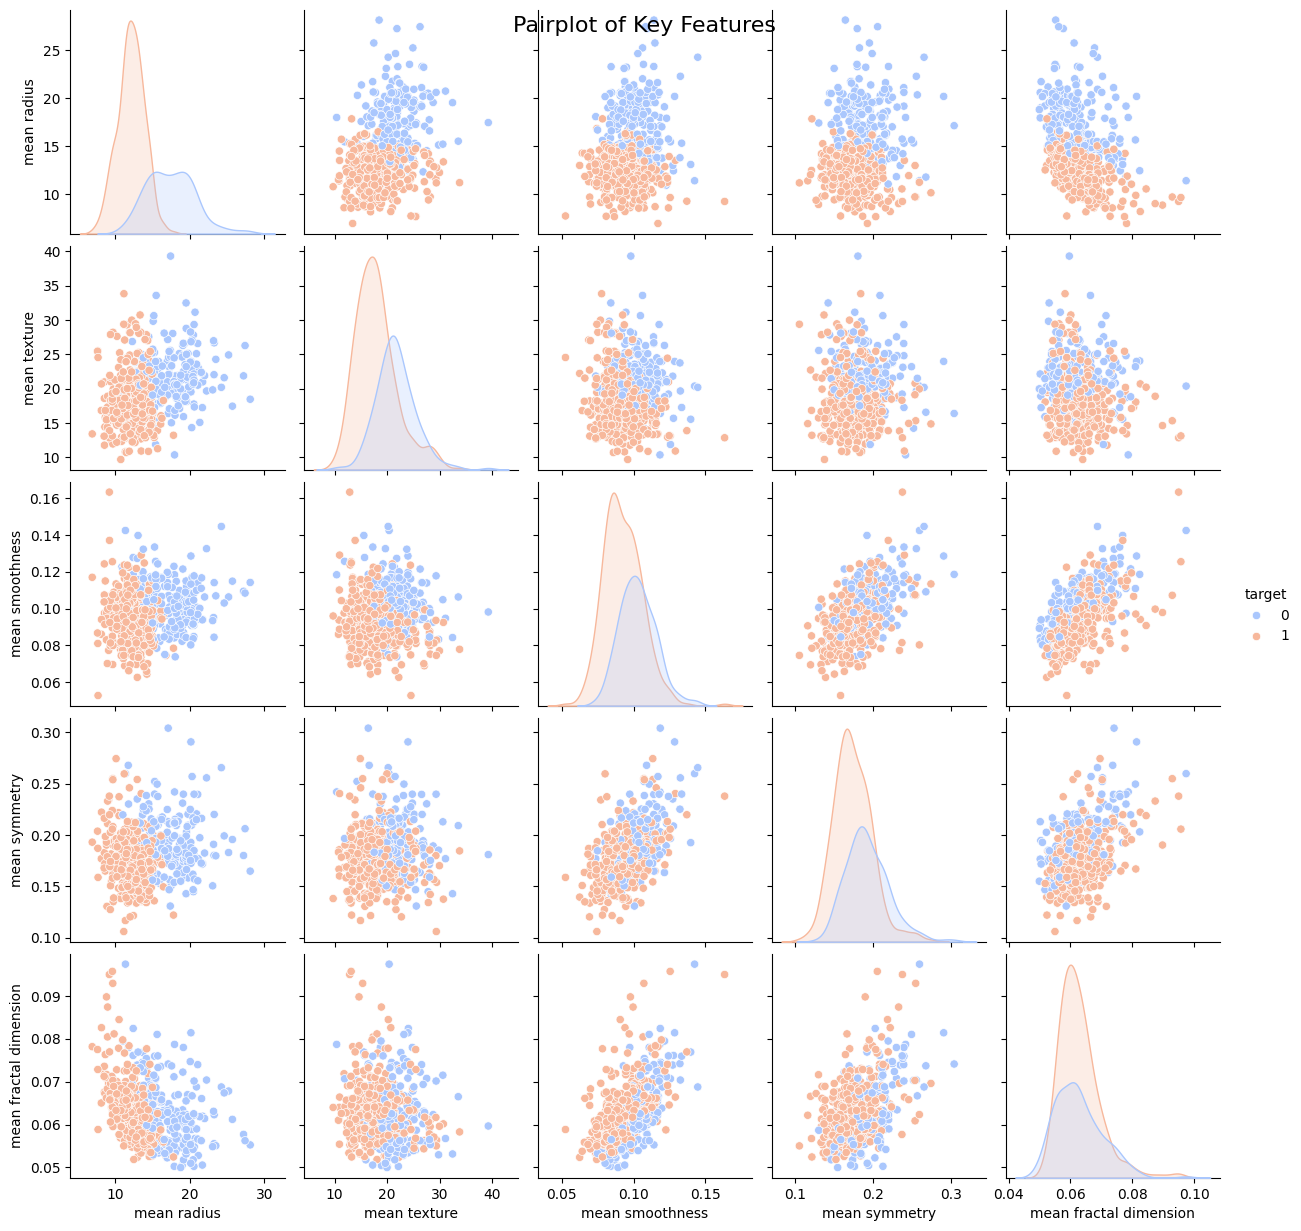

C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\3806806359.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=data, palette='coolwarm', ax=ax)
C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\3806806359.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=data, palette='coolwarm', ax=ax)
C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\3806806359.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=data, palette='coolwarm', ax=ax)
C:\Users\Asus\AppDa

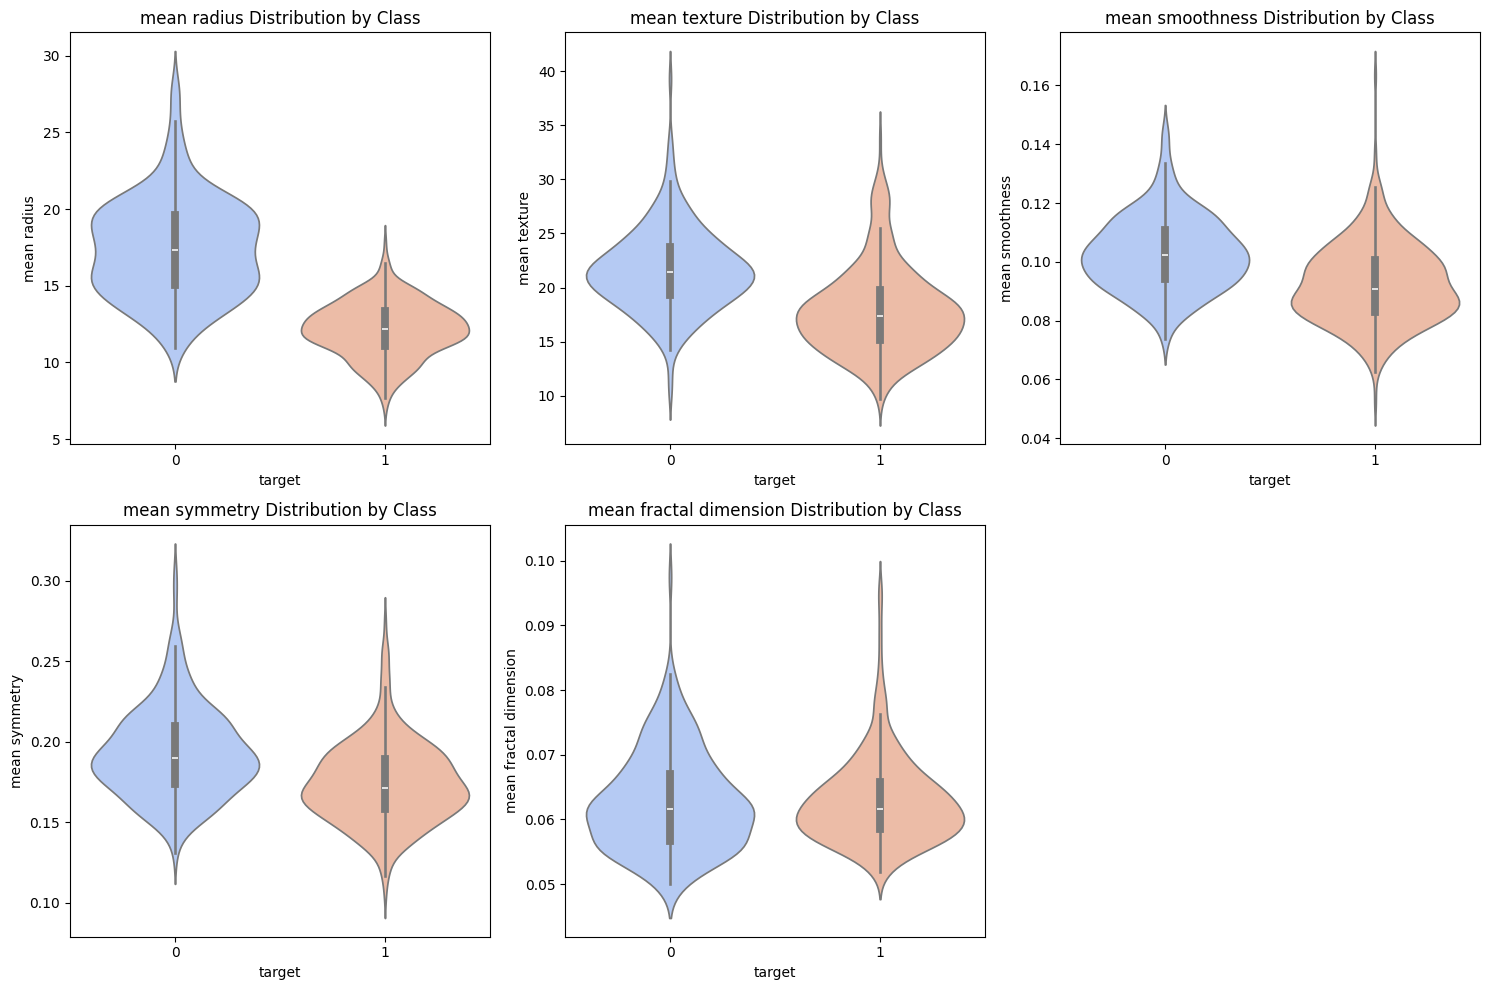

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display data summary and check for missing values
desc = cancer_data.describe()
missing_values = cancer_data.isnull().sum()
print(desc)
print(missing_values)

# Plot feature distributions using histograms and KDEs
def plot_feature_distributions(data, features):
    plt.figure(figsize=(15, 12))
    for idx, feature in enumerate(features):
        ax = plt.subplot(2, 3, idx + 1)
        sns.histplot(data[feature], kde=True, bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f'{feature} Distribution')
    plt.tight_layout()
    plt.show()

key_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry', 'mean fractal dimension']
plot_feature_distributions(cancer_data, key_features)

# Boxplots to detect outliers in key features
def plot_boxplots(data, features):
    plt.figure(figsize=(12, 8))
    for idx, feature in enumerate(features):
        ax = plt.subplot(2, 3, idx + 1)
        sns.boxplot(x=data[feature], color='lightgreen', ax=ax)
        ax.set_title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

plot_boxplots(cancer_data, key_features)

# Generate a correlation heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 10))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=1, linecolor='white')
    plt.title('Correlation Heatmap', fontsize=16)
    plt.show()

plot_correlation_heatmap(cancer_data)

# Create pairplot to explore relationships between key features and target variable
def plot_pairplot(data, features):
    sns.pairplot(data[features + ['target']], diag_kind='kde', hue='target', palette='coolwarm')
    plt.suptitle('Pairplot of Key Features', fontsize=16)
    plt.show()

plot_pairplot(cancer_data, key_features)

# Violin plots to show feature distribution by class (target variable)
def plot_violin_plots(data, features):
    plt.figure(figsize=(15, 10))
    for idx, feature in enumerate(features):
        ax = plt.subplot(2, 3, idx + 1)
        sns.violinplot(x='target', y=feature, data=data, palette='coolwarm', ax=ax)
        ax.set_title(f'{feature} Distribution by Class')
    plt.tight_layout()
    plt.show()

plot_violin_plots(cancer_data, key_features)


## Data Cleaning

Initial Data Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst

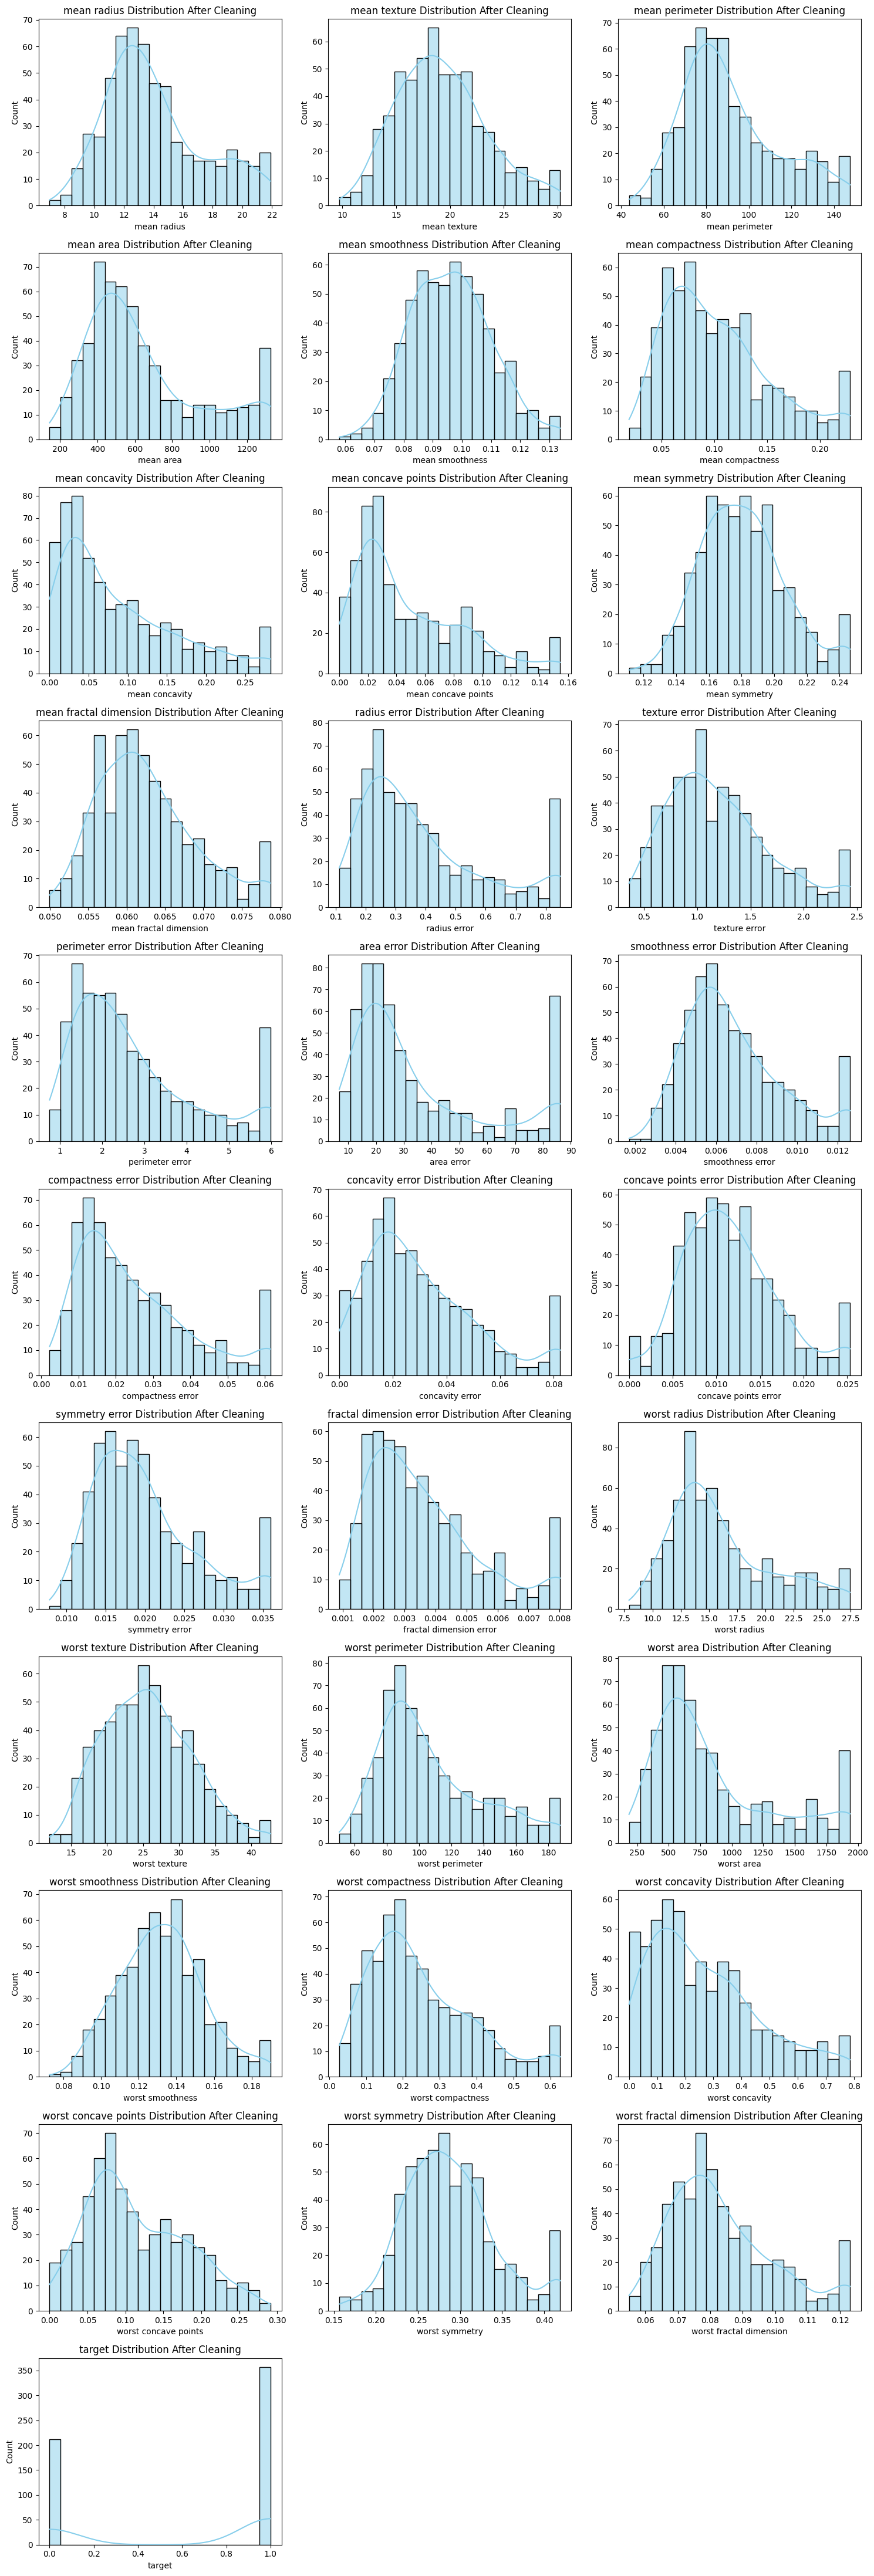


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def initial_data_overview(data):
    print("Initial Data Overview:")
    print(data.head())
    print(data.dtypes)

def check_duplicates(data):
    duplicates = data.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")

    if duplicates > 0:
        data = data.drop_duplicates()
        print(f"After removing duplicates, new data shape: {data.shape}")
    else:
        print("No duplicate rows found.")
    
    return data

def check_missing_values(data):
    missing_values = data.isnull().sum()
    print(f"\nMissing values per column:\n{missing_values}")

def detect_outliers(data, features):
    Q1 = data[features].quantile(0.25)
    Q3 = data[features].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[features] < lower_bound) | (data[features] > upper_bound)
    outliers_count = outliers.sum()
    
    for feature in features:
        if outliers[feature].any():
            print(f"\nOutliers detected in feature: {feature}")
    
    return outliers, lower_bound, upper_bound

def handle_outliers(data, features, outliers, lower_bound, upper_bound):
    for feature in features:
        if outliers[feature].any():
            data[feature] = np.where(data[feature] < lower_bound[feature], lower_bound[feature], data[feature])
            data[feature] = np.where(data[feature] > upper_bound[feature], upper_bound[feature], data[feature])
            print(f"Outliers handled for feature: {feature}")
    
    return data

def visualize_cleaned_data(data, features):
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

    plt.figure(figsize=(num_cols * 5, num_rows * 4))
    for idx, feature in enumerate(features):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        sns.histplot(data[feature], kde=True, bins=20, color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(f'{feature} Distribution After Cleaning')
    
    plt.tight_layout()
    plt.show()

# Run data overview and cleaning functions
initial_data_overview(cancer_data)

cancer_data = check_duplicates(cancer_data)

check_missing_values(cancer_data)

numerical_features = cancer_data.select_dtypes(include=[np.number]).columns
outliers, lower_bound, upper_bound = detect_outliers(cancer_data, numerical_features)

cancer_data = handle_outliers(cancer_data, numerical_features, outliers, lower_bound, upper_bound)

visualize_cleaned_data(cancer_data, numerical_features)

check_missing_values(cancer_data)


## c)Check for Class Imbalance

Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\1353420093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=cancer_data, palette='Set2')


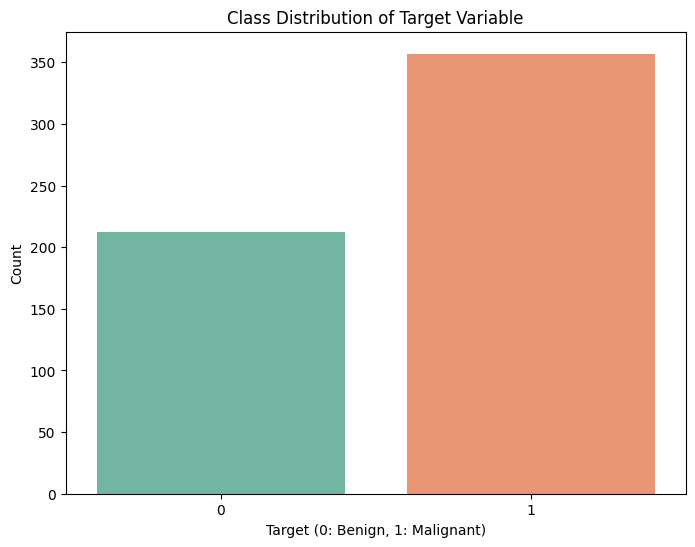

In [6]:
# Checking for class imbalance
class_counts = cancer_data['target'].value_counts()
print("Class Distribution:")
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=cancer_data, palette='Set2')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

## 3. Logistic Regression Model
### I. Split the data into training and testing.

In [7]:
# Splitting the dataset into training and testing sets
X = cancer_data.drop('target', axis=1)  # Independent variables
y = cancer_data['target']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, stratify=y)

# Training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### II.	evaluation metrics 

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Shape of y_test: (171,)
Shape of y_pred: (171,)
Confusion Matrix:
[[ 62   2]
 [  3 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Accuracy Score: 0.9707602339181286

F1-Score: 0.9765258215962441

Cohen's Kappa: 0.9377683965354101

ROC AUC Score: 0.9926985981308412

R² (Accuracy as Proxy): 0.9707602339181286

McFadden's R²: 0.8510630694291157


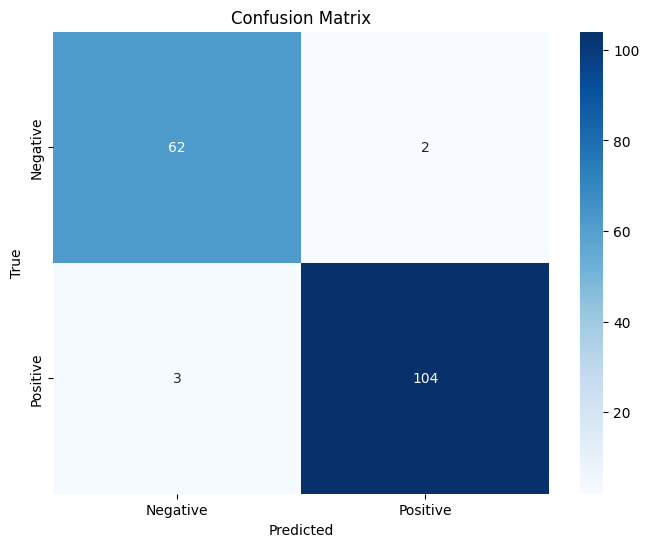

In [13]:
from sklearn.metrics import log_loss

# Fit the Logistic Regression Model and make predictions
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Check the shapes of y_test and y_pred
def check_shapes(y_test, y_pred):
    print(f"Shape of y_test: {y_test.shape}")
    print(f"Shape of y_pred: {y_pred.shape}")
    return y_test.shape == y_pred.shape

shapes_match = check_shapes(y_test, y_pred)

# Define functions for evaluation metrics
def display_confusion_matrix(y_test, y_pred):
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    return cm

def display_classification_report(y_test, y_pred):
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

def display_accuracy_score(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy Score:", accuracy)
    return accuracy

def display_f1_score(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    print("\nF1-Score:", f1)
    return f1

def display_cohens_kappa(y_test, y_pred):
    kappa = cohen_kappa_score(y_test, y_pred)
    print("\nCohen's Kappa:", kappa)
    return kappa

def display_roc_auc_score(y_test, y_pred_proba):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("\nROC AUC Score:", roc_auc)
    return roc_auc

def display_mcfaddens_r2(y_test, y_pred_proba):
    llf = log_loss(y_test, y_pred_proba)  # Using log loss as a proxy for log-likelihood
    llnull = log_loss(y_test, [y_test.mean()] * len(y_test))
    mcfadden_r2 = 1 - (llf / llnull)
    print("\nMcFadden's R²:", mcfadden_r2)
    return mcfadden_r2

# Evaluation and metrics output
if shapes_match:
    cm = display_confusion_matrix(y_test, y_pred)
    display_classification_report(y_test, y_pred)
    accuracy = display_accuracy_score(y_test, y_pred)
    f1 = display_f1_score(y_test, y_pred)
    kappa = display_cohens_kappa(y_test, y_pred)
    roc_auc = display_roc_auc_score(y_test, y_pred_proba)
    r2 = accuracy  # Accuracy as a proxy for classification models
    print("\nR² (Accuracy as Proxy):", r2)
    mcfadden_r2 = display_mcfaddens_r2(y_test, y_pred_proba)
else:
    print("The lengths of y_test and y_pred do not match.")

# Plotting the Confusion Matrix using Seaborn
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_confusion_matrix(cm)


### III. Interpretation 

ROC AUC Score: 0.99


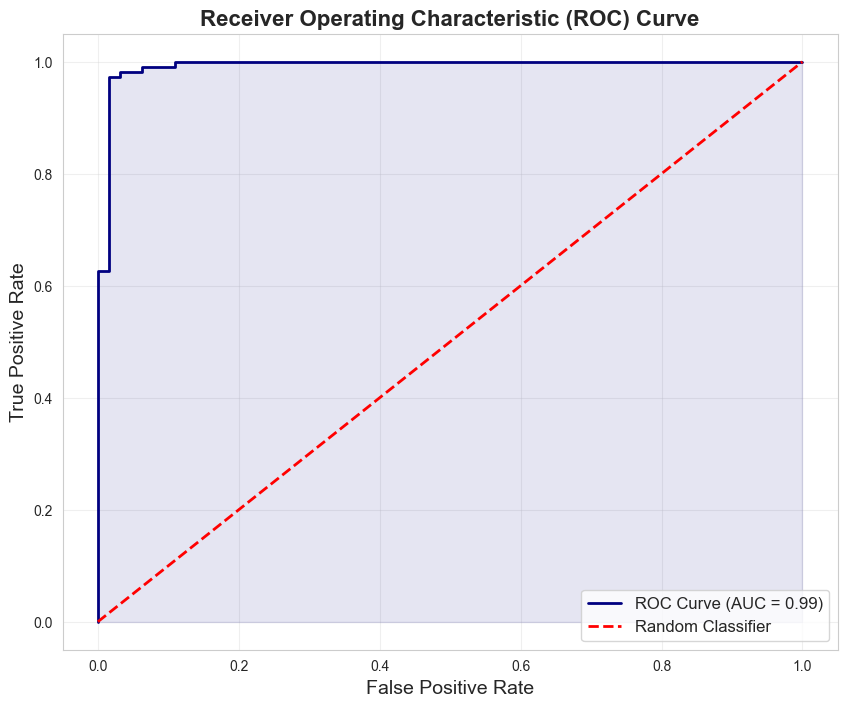

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

def calculate_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    return fpr, tpr, thresholds, roc_auc

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")
    plt.plot(fpr, tpr, color='navy', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', lw=2, label="Random Classifier")
    plt.fill_between(fpr, tpr, alpha=0.1, color='navy')
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds, roc_auc = calculate_roc_curve(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve with improved look and feel
plot_roc_curve(fpr, tpr, roc_auc)


## 4.	Use α = 0.05 to determine whether each of the independent variables is significant.

In [17]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(X):
    X_with_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X.shape[1])]
    return vif_data

# Function to remove features with high VIF
def remove_high_vif_features(X, vif_threshold=10):
    vif_data = calculate_vif(X)
    high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()
    X_reduced = X.drop(columns=high_vif_features)
    return X_reduced, high_vif_features

# Function to refit the logistic regression model
def refit_logistic_regression(y, X):
    X_with_const = sm.add_constant(X)
    logit_model = sm.Logit(y, X_with_const)
    result = logit_model.fit()
    return result

# Function to identify significant features
def identify_significant_features(result, significance_level=0.05):
    pvalues = result.pvalues
    significant_features = pvalues[pvalues < significance_level]
    return significant_features

# Step-by-step execution
print("Initial Data Overview:")
print(cancer_data.head())
print(cancer_data.dtypes)

# Calculate VIF and remove high VIF features
vif_data = calculate_vif(X_train)
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

X_train_reduced, high_vif_features = remove_high_vif_features(X_train)
print(f"\nRemoved features with high VIF: {high_vif_features}")

# Refit the logistic regression model with reduced features
result_reduced = refit_logistic_regression(y_train, X_train_reduced)

# Display p-values for features
print("\nP-values for Features (Reduced Model):")
print(result_reduced.pvalues)

# Identify significant features
significant_features_reduced = identify_significant_features(result_reduced)
print("\nSignificant Features (Reduced Model):")
print(significant_features_reduced)


Initial Data Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0         0.118400   
1        20.57         17.77          132.90     1326.0         0.084740   
2        19.69         21.25          130.00     1203.0         0.109600   
3        11.42         20.38           77.58      386.1         0.133695   
4        20.29         14.34          135.10     1297.0         0.100300   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.22862         0.28241              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.22862         0.24140              0.10520         0.2464   
4           0.13280         0.19800              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst

## 5.	What is the estimated odds ratio for five variables of your choice? Interpret it.

In [39]:
# Compute odds ratios
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
}).sort_values(by='Odds Ratio', ascending=False)
print("\nCoefficients and Odds Ratios:")
print(coefficients)

# Interpretation: Odds > 1 increase the odds of the outcome, and < 1 decrease it.



Coefficients and Odds Ratios:
                    Feature  Coefficient  Odds Ratio
0               mean radius     1.506329    4.510146
12          perimeter error     0.512435    1.669351
20             worst radius     0.467611    1.596177
10             radius error     0.279208    1.322083
15        compactness error     0.236667    1.267019
11            texture error     0.211438    1.235453
16          concavity error     0.103968    1.109565
19  fractal dimension error     0.028022    1.028419
9    mean fractal dimension     0.016273    1.016406
18           symmetry error     0.010367    1.010421
3                 mean area     0.001834    1.001836
29  worst fractal dimension    -0.004078    0.995931
23               worst area    -0.015679    0.984444
1              mean texture    -0.017111    0.983035
2            mean perimeter    -0.019332    0.980854
14         smoothness error    -0.035007    0.965598
17     concave points error    -0.083247    0.920124
13             

## 6. Predicting for a Specific Patient

In [22]:
import pandas as pd

def predict_patient_outcome(model, patient_data, model_features):
    # Align patient data with model features
    patient_data_aligned = patient_data.reindex(columns=model_features, fill_value=0)
    
    # Make prediction
    patient_prediction = model.predict(patient_data_aligned)
    
    # Interpret prediction
    outcome = "Malignant" if patient_prediction[0] == 1 else "Benign"
    return outcome

# Define patient data
patient_data = pd.DataFrame({
    'mean radius': [14.5],
    'mean texture': [18.0],
    'mean smoothness': [0.095],
    'mean symmetry': [0.180]
})

# Model features
model_features = X.columns

# Predict and display outcome
patient_outcome = predict_patient_outcome(model, patient_data, model_features)
print("\nPatient Prediction:", patient_outcome)



Patient Prediction: Malignant


C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\4064335623.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=cancer_data, x='target', y=feature, palette="Set2", ax=axes[row][col], jitter=True, size=5, alpha=0.7)
C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\4064335623.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=cancer_data, x='target', y=feature, palette="Set2", ax=axes[row][col], jitter=True, size=5, alpha=0.7)
C:\Users\Asus\AppData\Local\Temp\ipykernel_6560\4064335623.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

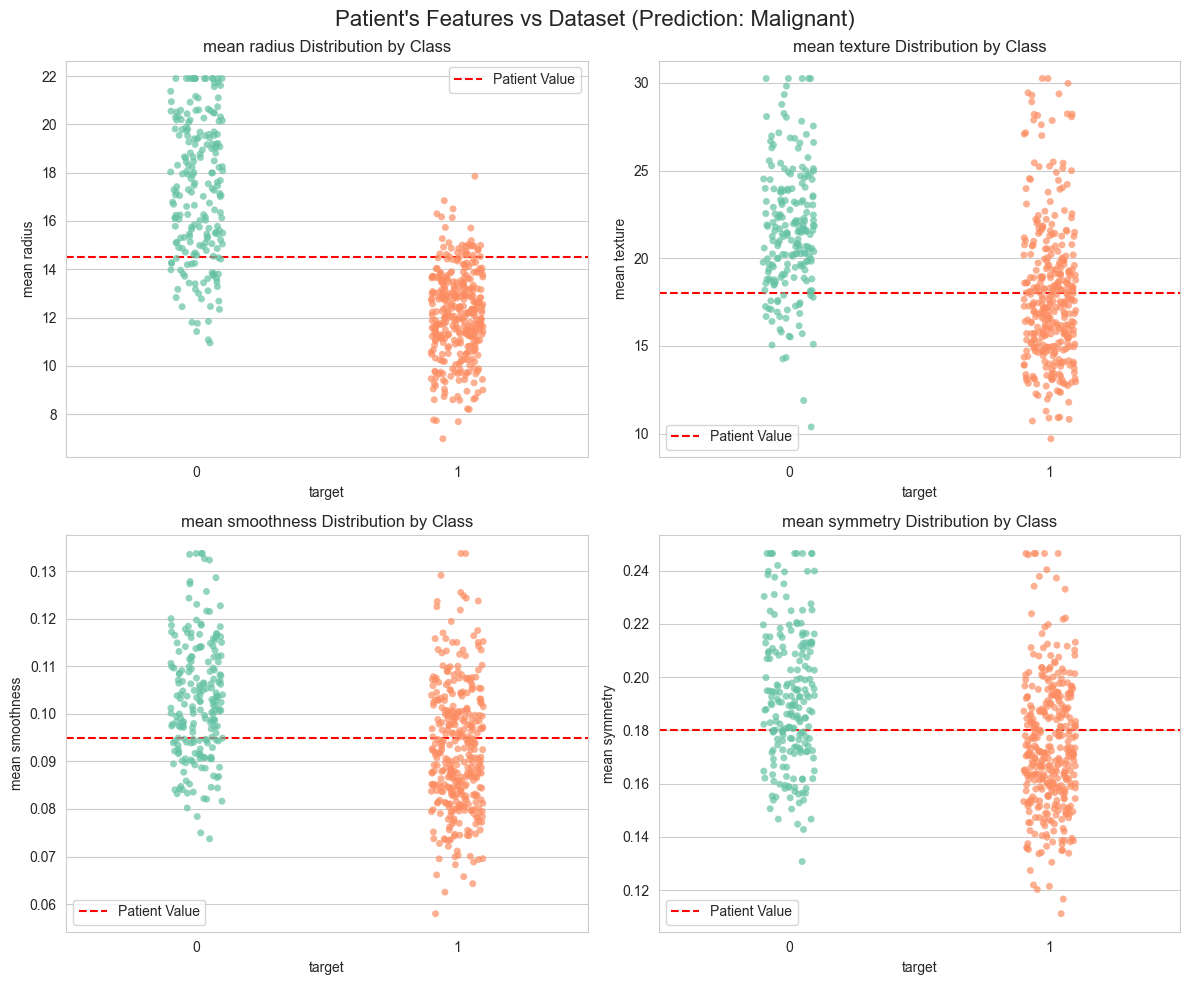

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aligning the patient data with model features (fill missing columns with zeros)
patient_data_aligned = patient_data.reindex(columns=X.columns, fill_value=0)

# Make a prediction for the patient
patient_prediction = model.predict(patient_data_aligned)
prediction_result = "Malignant" if patient_prediction[0] == 1 else "Benign"

# Visualize patient's features vs. dataset distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features_to_visualize = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

for i, feature in enumerate(features_to_visualize):
    row, col = divmod(i, 2)
    sns.stripplot(data=cancer_data, x='target', y=feature, palette="Set2", ax=axes[row][col], jitter=True, size=5, alpha=0.7)
    axes[row][col].axhline(patient_data[feature].values[0], color='red', linestyle='--', label="Patient Value")
    axes[row][col].set_title(f'{feature} Distribution by Class')
    axes[row][col].legend()

plt.suptitle(f"Patient's Features vs Dataset (Prediction: {prediction_result})", fontsize=16)
plt.tight_layout()
plt.show()
